# Imports

In [1]:
import os
os.chdir("../scripts/")

In [2]:
import gymnasium as gym
import numpy as np
from agents.q_agents import WindTargetChaser
from utils.plot import plot_smooth_curve

gym.register(id="WindGridWorld-v0",
             entry_point="environments.simple:WindGridWorld",
             nondeterministic=True)

# SARSA with 4 actions available

In [3]:
wind_map = np.array([[
    [0, 0], [0, 0], [0, 0], [0, 1], [0, 1],
    [0, 1], [0, 2], [0, 2], [0, 1], [0, 0]
]] * 7, dtype=int)

wind_stds = np.ones(shape=(7, 10))

env = gym.make("WindGridWorld-v0", shape=(7, 10), is_windy=False, wind_map=wind_map)

In [4]:
print(f"Action space size: {env.action_space.n}")
print(f"Sample action: {env.action_space.sample()}")

print(f"Observation space size: {env.observation_space["agent"].nvec}")
observation, info = env.reset()
print(f"Example observation: {observation}")
print(f"Current distance between agent and target: {info["distance"]}")
env.close()

Action space size: 4
Sample action: 2
Observation space size: [ 7 10]
Example observation: {'agent': array([1, 0]), 'target': array([6, 7])}
Current distance between agent and target: 2.932972087668518


In [5]:
max_num_steps = 1000
num_train_episodes = 10_000
num_eval_episodes = 100

learning_rate = 0.5
exploraiton_rate = 0.1
discounting_factor = 0.95

world_shape = (7, 10)
is_windy = True
wind_map = np.array([[
    [0, 0], [0, 0], [0, 0], [0, 1], [0, 1],
    [0, 1], [0, 2], [0, 2], [0, 1], [0, 0]
]] * 7, dtype=int)

In [6]:
train_env = gym.wrappers.RecordEpisodeStatistics(
    gym.make("WindGridWorld-v0",
             shape=world_shape,
             is_windy=True,
             wind_map=wind_map,
             max_episode_steps=max_num_steps),
    buffer_length=num_train_episodes
)

agent = WindTargetChaser(
    env=train_env,
    epsilon=exploraiton_rate,
    learning_rate=learning_rate,
    gamma=discounting_factor
)

agent.learn(
    num_episodes=num_train_episodes,
    num_steps=max_num_steps,
    show_progress=True
)

  0%|          | 0/10000 [00:00<?, ?it/s]

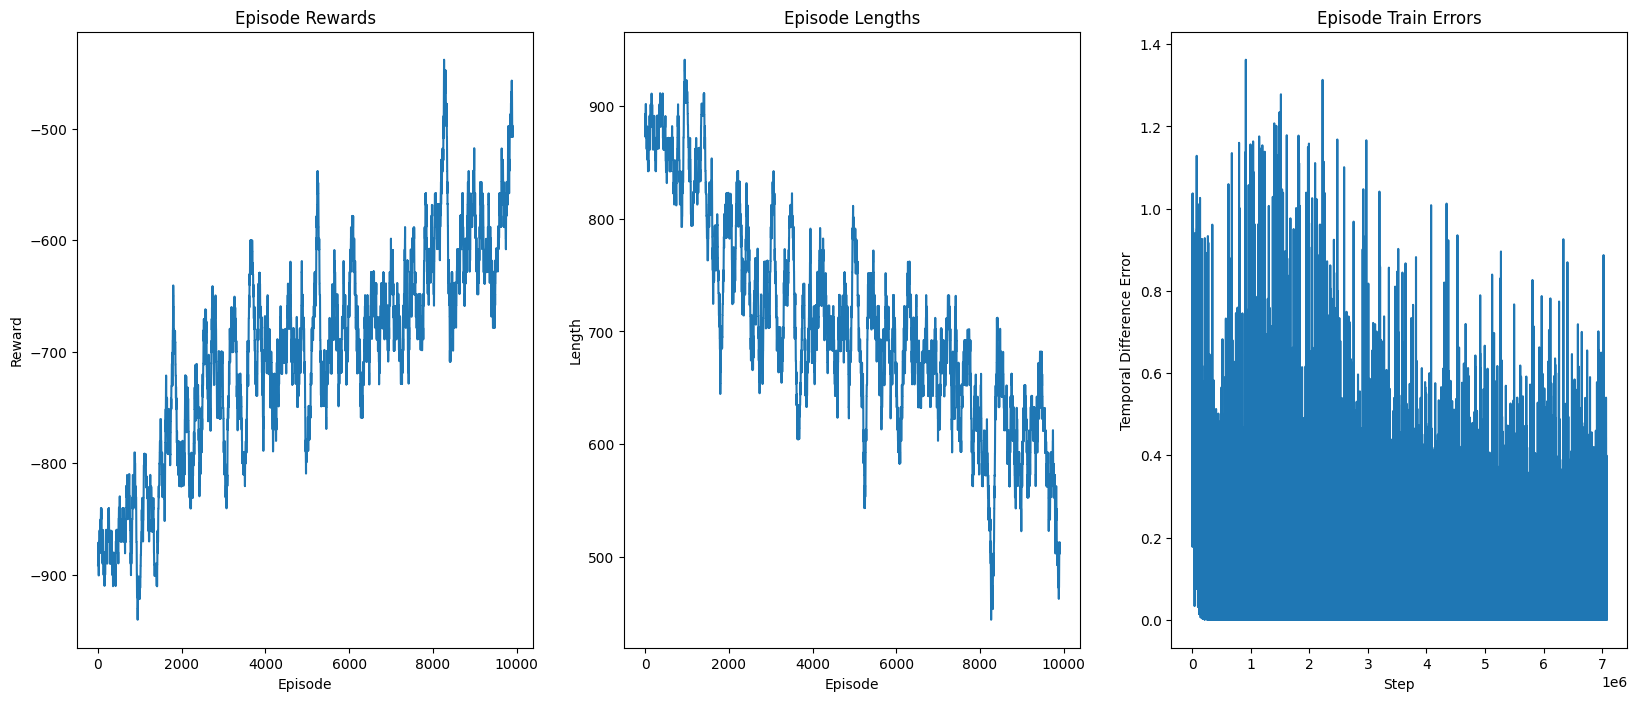

In [7]:
plot_smooth_curve(agent, train_env, smoothing_window=100)

# SARSA with 8 actions available

In [8]:
max_num_steps = 1000
num_train_episodes = 10_000
num_eval_episodes = 100

learning_rate = 0.5
exploraiton_rate = 0.1
discounting_factor = 0.95

world_shape = (7, 10)
is_windy = True
wind_map = np.array([[
    [0, 0], [0, 0], [0, 0], [0, 1], [0, 1],
    [0, 1], [0, 2], [0, 2], [0, 1], [0, 0]
]] * 7, dtype=int)

In [9]:
train_env = gym.wrappers.RecordEpisodeStatistics(
    gym.make("WindGridWorld-v0",
             shape=world_shape,
             diagonal_actions=True,
             is_windy=True,
             wind_map=wind_map,
             max_episode_steps=max_num_steps),
    buffer_length=num_train_episodes
)

agent = WindTargetChaser(
    env=train_env,
    epsilon=exploraiton_rate,
    learning_rate=learning_rate,
    gamma=discounting_factor
)

agent.learn(
    num_episodes=num_train_episodes,
    num_steps=max_num_steps,
    show_progress=True
)

  0%|          | 0/10000 [00:00<?, ?it/s]

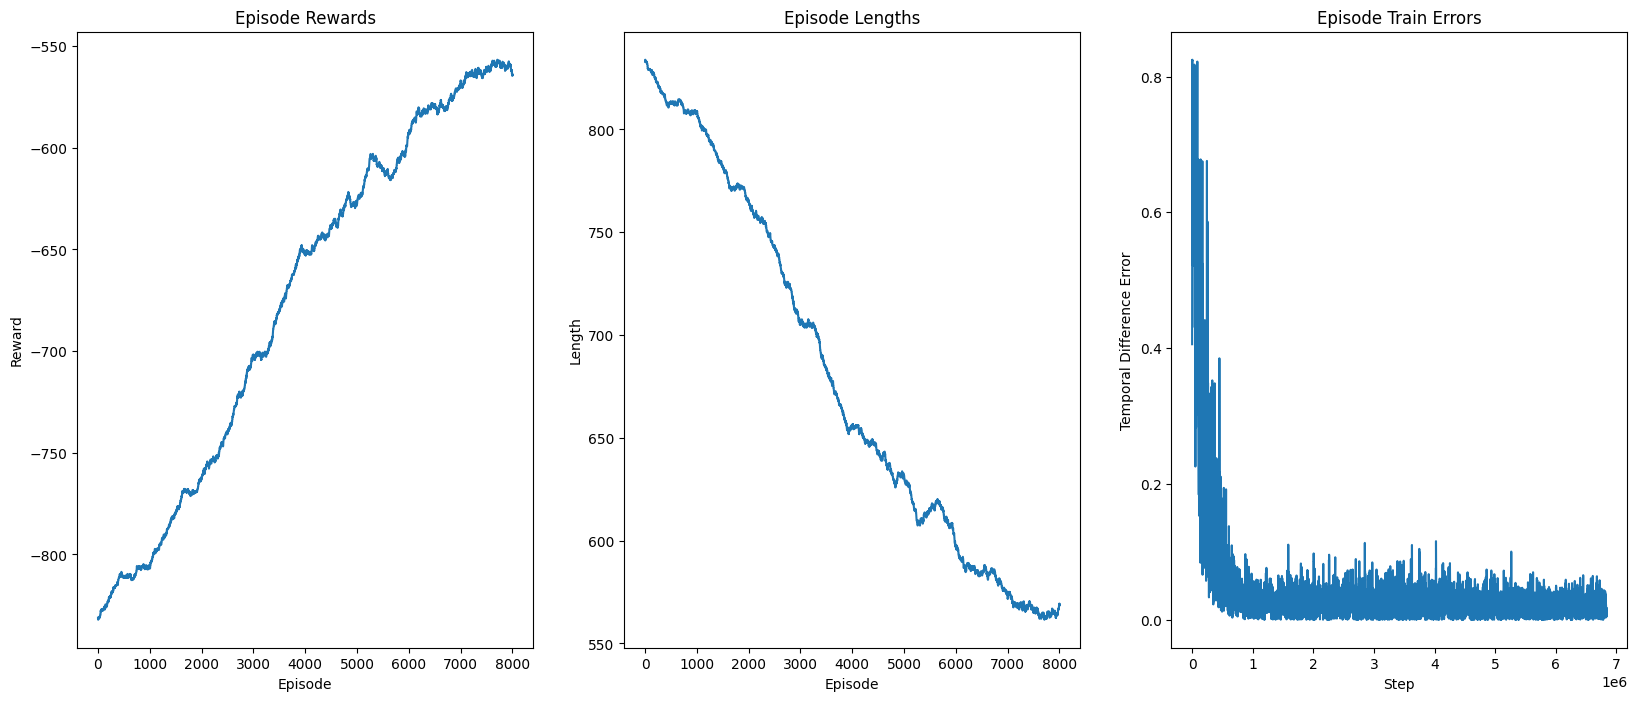

In [10]:
plot_smooth_curve(agent, train_env, smoothing_window=2000)

# SARSA with 9 actions (8 move + 1 noop)

In [11]:
max_num_steps = 100
num_train_episodes = 100_000
num_eval_episodes = 100

learning_rate = 0.5
exploraiton_rate = 0.1
discounting_factor = 0.95

world_shape = (7, 10)
is_windy = True

wind_means = np.array([[
    0, 0, 0, 1, 1, 1, 2, 2, 1, 0
]] * 7, dtype=int)

wind_stds = np.ones(shape=(7, 10), dtype=int)

In [12]:
train_env = gym.wrappers.RecordEpisodeStatistics(
    gym.make("WindGridWorld-v0",
             shape=world_shape,
             diagonal_actions=True,
             support_noop=True,
             is_windy=True,
             wind_map=wind_map,
             max_episode_steps=max_num_steps),
    buffer_length=num_train_episodes
)

agent = WindTargetChaser(
    env=train_env,
    epsilon=exploraiton_rate,
    learning_rate=learning_rate,
    gamma=discounting_factor
)

agent.learn(
    num_episodes=num_train_episodes,
    num_steps=max_num_steps,
    show_progress=True
)

  0%|          | 0/100000 [00:00<?, ?it/s]

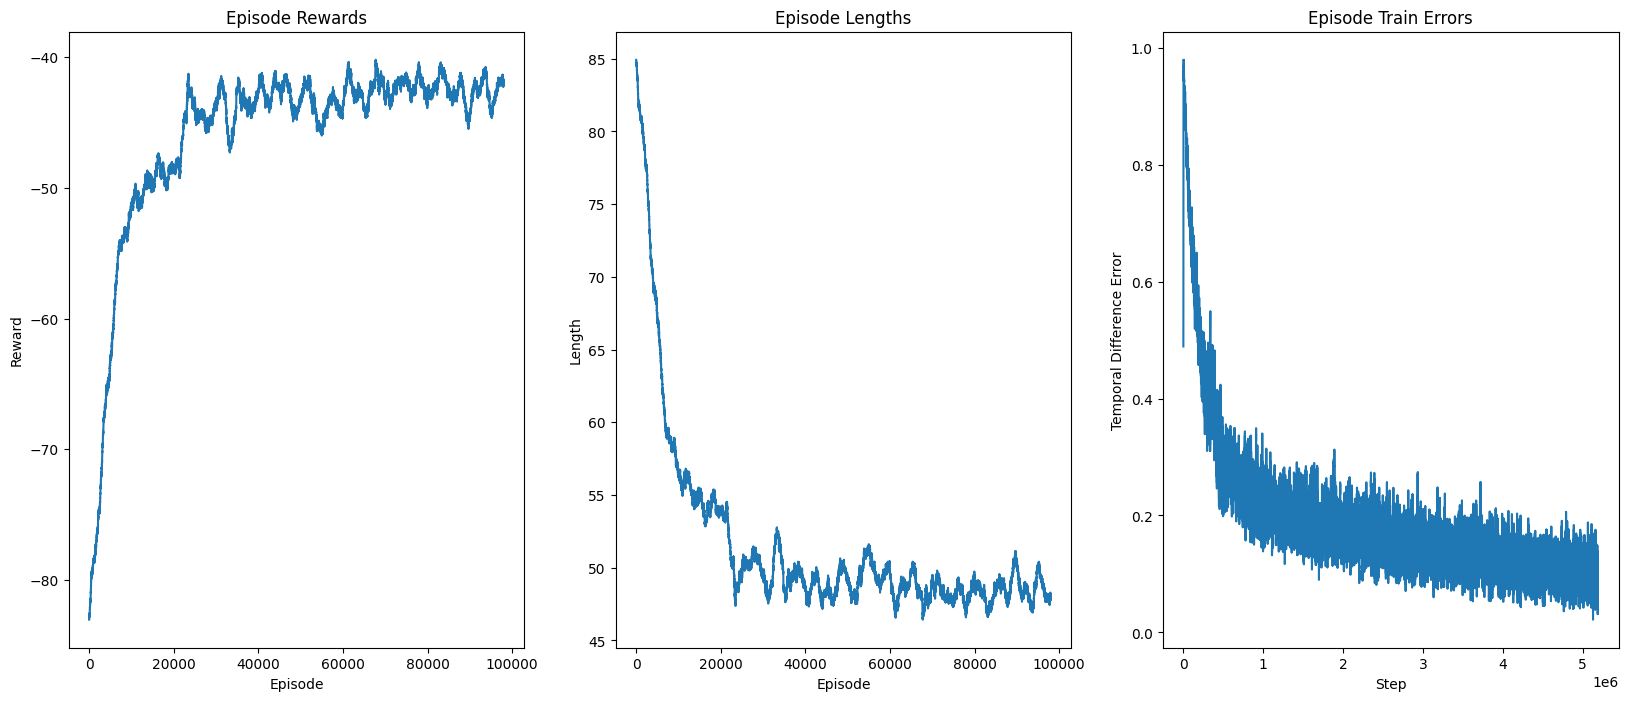

In [13]:
plot_smooth_curve(agent, train_env, smoothing_window=2000)